In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/zn/ktqkd_jd05bd8_bq3gf7rpj40000gn/T/ipykernel_10016/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dtypes = { 'transaction_id': str, 'merchant_id': str, 'user_id': str, 'card_number': str, 'transaction_date': str, 'transaction_amount': float, 'device_id': str, 'has_cbk': bool}

In [3]:
# Read data, dropping all rows with NaN device_id
transactions_data = pd.read_csv('transactional-sample.csv', dtype=dtypes)
transactions_data_cleaned = transactions_data.dropna()
transactions_data

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01T13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01T11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01T10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01T01:29:45.799767,359.68,NaN,False


In [21]:
percentage_of_transactions_with_device = len(transactions_data_cleaned) / len(transactions_data) * 100

# percentage of transactions with device filled
percentage_of_transactions_with_device

74.05439199749921

In [23]:
# dataframe with all chargebacked transactions
cbk_transactions = transactions_data.loc[transactions_data.has_cbk == True]

cbk_transactions

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105,True
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
7,21320405,56107,81152,650516******9201,2019-12-01T21:24:05.608374,188.68,486,True
8,21320406,56107,81152,650516******9201,2019-12-01T21:13:21.529999,352.77,486,True
9,21320407,56107,81152,650516******9201,2019-12-01T21:04:55.066909,345.68,486,True
...,...,...,...,...,...,...,...,...
3157,21323555,41354,19820,606282******6581,2019-11-02T18:04:22.088172,4028.55,NaN,True
3165,21323563,41354,19820,606282******6581,2019-11-02T16:33:21.333131,4031.00,NaN,True
3178,21323576,16266,96495,522840******2045,2019-11-01T22:10:49.517024,762.18,NaN,True
3180,21323578,16266,96495,552305******4782,2019-11-01T20:54:04.014855,2936.66,NaN,True


In [24]:
# dataframe with all chargebacked transactions
tmp_cbk_transactions = transactions_data_cleaned.loc[transactions_data_cleaned.has_cbk == True]

tmp_cbk_transactions

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105,True
7,21320405,56107,81152,650516******9201,2019-12-01T21:24:05.608374,188.68,486,True
8,21320406,56107,81152,650516******9201,2019-12-01T21:13:21.529999,352.77,486,True
9,21320407,56107,81152,650516******9201,2019-12-01T21:04:55.066909,345.68,486,True
13,21320411,56107,81152,650516******7004,2019-12-01T20:36:55.091278,32.86,486,True
...,...,...,...,...,...,...,...,...
2634,21323032,91972,8761,410863******4853,2019-11-15T23:02:24.682530,3986.64,918124,True
2645,21323043,49919,43913,406655******5230,2019-11-15T19:55:21.008422,3924.63,53477,True
2651,21323049,49919,78262,514868******3935,2019-11-15T18:32:53.486074,4089.88,547440,True
2672,21323070,91972,97611,230744******950,2019-11-14T23:27:58.402272,2139.43,457665,True


In [25]:
(324/391)*100

82.86445012787725

In [26]:
transactions_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2920
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      2369 non-null   object 
 1   merchant_id         2369 non-null   object 
 2   user_id             2369 non-null   object 
 3   card_number         2369 non-null   object 
 4   transaction_date    2369 non-null   object 
 5   transaction_amount  2369 non-null   float64
 6   device_id           2369 non-null   object 
 7   has_cbk             2369 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 150.4+ KB


In [27]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   object 
 1   merchant_id         3199 non-null   object 
 2   user_id             3199 non-null   object 
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   object 
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 178.2+ KB


In [32]:
grouped_merchants = transactions_data.groupby('merchant_id').size()
grouped_merchants.sort_values(ascending=False)

merchant_id
49205    73
17275    30
79698    22
4705     22
53041    19
         ..
44519     1
44464     1
44379     1
44336     1
99799     1
Length: 1756, dtype: int64

In [35]:
grouped_merchants[grouped_merchants > 1].sort_values(ascending=False)

merchant_id
49205    73
17275    30
79698    22
4705     22
53041    19
         ..
48376     2
47252     2
46666     2
46609     2
5557      2
Length: 514, dtype: int64

In [36]:
(514/1756)*100

29.271070615034166

In [37]:
top_10_merchants = grouped_merchants.sort_values(ascending=False).head(10)

In [50]:
merchants_with_cbk_percentages = transactions_data.groupby('merchant_id')['has_cbk'].agg(total_count='count', has_cbk=lambda x: (x.sum() / len(x)) * 100).sort_values(by='total_count',ascending=False)

merchants_with_cbk_percentages

,total_count,has_cbk
merchant_id,,
49205,73,0.000000
17275,30,73.333333
79698,22,0.000000
4705,22,86.363636
53041,19,73.684211
...,...,...
44519,1,0.000000
44464,1,0.000000
44379,1,0.000000


As I searched around, I found out that 1% is an acceptable chargeback ratio for merchants. Our datasample brings a lot of merchants with high percentages of chargeback. Maybe it’s because we have a small sample, but that got me to think in put this as a pre-determinated Rule in our service. 
Some numbers:

In [55]:
# Merchants with more than 10% of transactions chargebacked
high_percentage_cbk = merchants_with_cbk_percentages[merchants_with_cbk_percentages.has_cbk > 10][merchants_with_cbk_percentages.total_count > 5]

/var/folders/zn/ktqkd_jd05bd8_bq3gf7rpj40000gn/T/ipykernel_10016/2645127876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_percentage_cbk = merchants_with_cbk_percentages[merchants_with_cbk_percentages.has_cbk > 10][merchants_with_cbk_percentages.total_count > 5]


In [71]:
top_20_merchants = merchants_with_cbk_percentages.head(20)
merchants_from_top20_with_high_cbk = top_20_merchants.index[top_20_merchants.index.isin(high_percentage_cbk.index)]

In [72]:
len(merchants_from_top20_with_high_cbk)

9

In [73]:
merchants_from_top20_with_high_cbk

Index(['17275', '4705', '53041', '77130', '1308', '91972', '99510', '42356',
       '44927'],
      dtype='object', name='merchant_id')

In [74]:
top_20_merchants

,total_count,has_cbk
merchant_id,,
49205,73,0.000000
17275,30,73.333333
79698,22,0.000000
4705,22,86.363636
53041,19,73.684211
26765,18,0.000000
17348,16,0.000000
26981,16,0.000000
42178,15,0.000000


In [79]:
top_20_merchants.sort_values(by='has_cbk', ascending=False)

,total_count,has_cbk
merchant_id,,
1308,15,100.000000
44927,11,100.000000
77130,15,86.666667
4705,22,86.363636
91972,14,78.571429
53041,19,73.684211
17275,30,73.333333
42356,12,66.666667
99510,12,58.333333


In [80]:
cbk_true = transactions_data[transactions_data['has_cbk'] == True]
cbk_false = transactions_data[transactions_data['has_cbk'] == False]

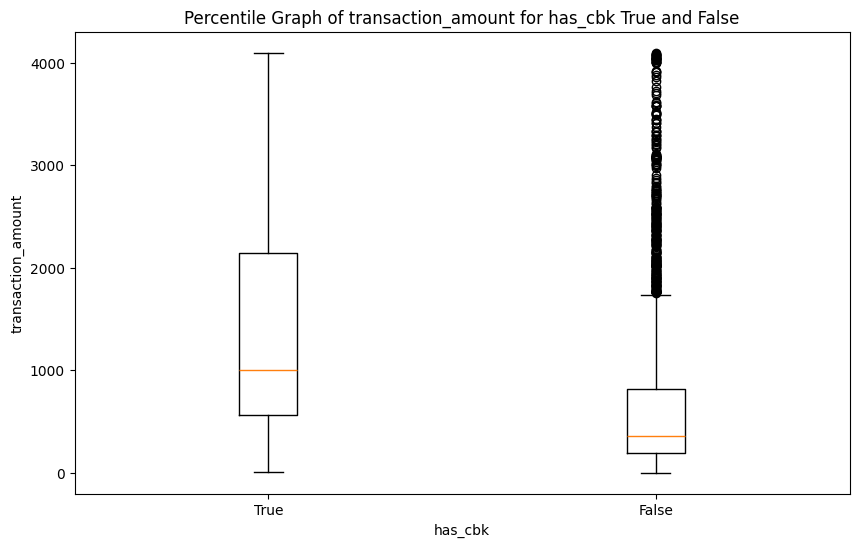

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot([cbk_true['transaction_amount'], cbk_false['transaction_amount']], labels=['True', 'False'])
plt.xlabel('has_cbk')
plt.ylabel('transaction_amount')
plt.title('Percentile Graph of transaction_amount for has_cbk True and False')
plt.show()

In [97]:
cbk_true_percentile = cbk_true['transaction_amount'].quantile(0.7)
cbk_false_percentile = cbk_false['transaction_amount'].quantile(0.9)

print("70th percentile of 'transaction_amount' in cbk_true:", cbk_true_percentile)
print("90th percentile of 'transaction_amount' in cbk_false:", cbk_false_percentile)

70th percentile of 'transaction_amount' in cbk_true: 2022.18
90th percentile of 'transaction_amount' in cbk_false: 1787.8170000000014


In [98]:
cbk_true_median = cbk_true['transaction_amount'].median()
cbk_false_median = cbk_false['transaction_amount'].median()

print("median of 'transaction_amount' in cbk_true:", cbk_true_median)
print("median of 'transaction_amount' in cbk_false:", cbk_false_median)

median of 'transaction_amount' in cbk_true: 999.47
median of 'transaction_amount' in cbk_false: 360.315


In [100]:
user_id_with_cbk_percentages = transactions_data.groupby('user_id')['has_cbk'].agg(total_count='count', has_cbk=lambda x: (x.sum() / len(x)) * 100).sort_values(by='total_count',ascending=False)

user_id_with_cbk_percentages.head(10)

,total_count,has_cbk
user_id,,
11750,31,80.645161
91637,22,86.363636
79054,17,88.235294
96025,14,92.857143
78262,13,92.307692
75710,10,100.000000
56877,9,55.555556
9853,9,44.444444
11452,8,37.500000
